In [3]:
import numpy as np
from numpy import random
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import load_model

Using TensorFlow backend.


In [6]:
dataset=np.load('/home/jabir/Project/MHCR/datasetgray.npy')

In [9]:
model=load_model('/home/jabir/Project/MHCR/modelMHCR_gray_2.8.96.97.h5')

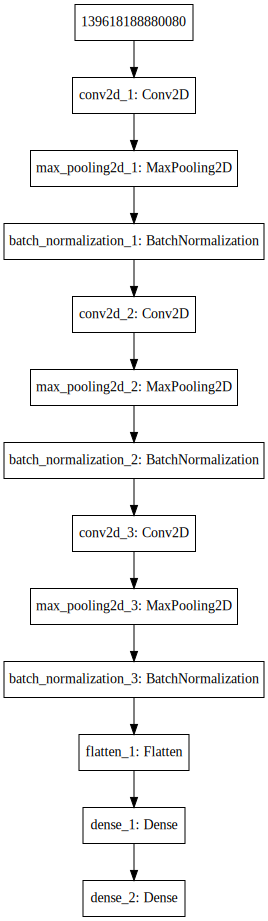

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

X=np.array([i[0]for i in dataset])
y=np.array([i[1] for i in dataset])

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

In [11]:
X=np.array([i[0]for i in dataset])
y=np.array([i[1] for i in dataset])

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=1) 
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)


(73521, 86, 86) (18381, 86, 86) (73521, 44) (18381, 44)
(58816, 86, 86) (14705, 86, 86) (58816, 44) (14705, 44)


In [ ]:
#np.save('/home/workstation/Desktop/jab/MHCR/testfile2.npy',test)

In [ ]:
c=np.load('/home/jabir/Project/MHCR/testfile2.npy')

In [ ]:
print(c)

In [ ]:
def get_confusion_matrix_one_hot(model_results, truth):
        '''model_results and truth should be for one-hot format, i.e, have >= 2 columns,
        where truth is 0/1, and max along each row of model_results is model result
        '''
        assert model_results.shape == truth.shape
        num_outputs = truth.shape[1]
        confusion_matrix = np.zeros((num_outputs, num_outputs), dtype=np.int32)
        predictions = np.argmax(model_results,axis=1)
        assert len(predictions)==truth.shape[0]

        for actual_class in range(num_outputs):
            idx_examples_this_class = truth[:,actual_class]==1
            prediction_for_this_class = predictions[idx_examples_this_class]
            for predicted_class in range(num_outputs):
                count = np.sum(prediction_for_this_class==predicted_class)
                confusion_matrix[actual_class, predicted_class] = count
        assert np.sum(confusion_matrix)==len(truth)
        assert np.sum(confusion_matrix)==np.sum(truth)
        return confusion_matrix

import cv2
predict=model.predict(np.array(cv2.imread('/home/workstation/Desktop/jab/DATASET/CHAR14/MD14.jpg')).reshape(-1,86,86,3))

In [ ]:
import cv2
predict=model.predict(np.array(cv2.imread('/home/jabir/Project/MHCR/DATASET/CHAR23/MD199.jpg')).reshape(-1,86,86,3))
print(predict.shape)

In [12]:
m=max(predict[0])
for i in range(len(predict[0])):
    if predict[0][i]==m:
        print(i,m)
    #else :print(predict[0][i],m)

22 0.9426167


In [ ]:
con_mat=get_confusion_matrix_one_hot(predict,y_test)
print(X_test.shape)
print(con_mat)

## plot confusion matrix

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
names=['ch'+str(i) for i in range(44)]

In [ ]:
plot_confusion_matrix(cm           = con_mat, 
                      normalize    = False,
                      target_names = names,
                      title        = "Confusion Matrix")


In [2]:
def mplot(img):
    plt.gcf().clear()
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

from keras import backend as K
K.clear_session()

In [77]:
import matplotlib.pyplot as plt
import cv2
img=cv2.imread('/home/jabir/Project/MHCR/realtest/img2.jpg',1)
#cv2.imshow('image',img)
#cv2.waitkey(0)
#cv2.destroyAllWindows()
mplot(img)

In [81]:
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(img,100,200,0)
#thresh=cv2.GaussianBlur(thresh,(3,3),0)
image, contours, hierarchy = cv2.findContours(imgray,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img2 = cv2.drawContours(imgray, contours, -1, (0,255,0), 3)

#cnt = contours[4]
#img3 = cv2.drawContours(thresh, [cnt], 0, (0,255,0), 3)
#mplot(img3)

In [67]:
img2=cv2.adaptiveThreshold(imgray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

In [69]:
import numpy as np
kernel=np.ones((4,4),np.uint8)
#th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
img3 = cv2.adaptiveThreshold(img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

img2=cv2.dilate(img3,kernel,iterations=1)
img2=cv2.erode(img2,kernel,iterations=1)


In [70]:
mplot(img2)

In [71]:
ret, thresh = cv2.threshold(img2, 10, 200, cv2.THRESH_OTSU)
mplot(thresh)

In [82]:
canny=cv2.Canny(thresh,100,200)

image, contours, hierarchy = cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img2 = cv2.drawContours(cv2.bitwise_not(canny), contours, -1, (0,255,0), 2)
img2=cv2.GaussianBlur(img2,(9,9),0)
mplot(img2)
for c in contours:
    rect = cv2.boundingRect(c)
    if rect[2] < 20 or rect[3] < 20:
        continue
    print(cv2.contourArea(c),end=',')
    x,y,w,h = rect
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,0),4)
    cv2.putText(img,'Moth Detected',(x+w+10,y+h),0,0.3,(0,0,0))

4.0,9.5,13.0,33.5,35.0,32.0,23.5,10.5,19.5,18.0,28.5,24.0,89.0,26.5,69.0,8.5,6.5,14.5,10.5,41.0,19.5,60.0,5.0,27.0,30.0,77.5,18.5,77.0,19.5,53.5,43.5,5.0,3.5,2.0,11.5,43.5,3.5,17.0,12.0,23.5,10.5,34.0,56.5,11.0,36.0,4.0,82.0,16.0,13.0,19.0,13.0,25.5,6.5,17.0,23.5,19.5,26.0,11.0,14.0,7.0,17.5,11.0,16.0,28.0,17.0,58.0,25.5,13.0,85.0,42.5,9.5,13.0,10.0,6.5,39.5,13.0,23.0,31.0,15.5,19.5,31.0,9.5,19.5,19.0,8.0,20.0,15.5,62.5,21.5,8.0,17.5,29.0,7.5,34.0,24.5,11.0,13.0,31.5,19.5,8.0,5.0,12.0,5.0,13.0,5.5,30.5,19.5,14.0,49.5,53.0,65.5,17.5,5.5,38.0,38.0,15.5,22.5,10.5,27.0,7.5,

In [74]:
mplot(img)

In [75]:
#static thresholding
ret,thresh = cv2.threshold(img,100,255,0)
thresh=cv2.GaussianBlur(thresh,(3,3),0)
mplot(thresh)

In [ ]:
roi=thresh[1130:1530,580:1080]
print(img.shape)

In [ ]:

roi=cv2.resize(roi,(86,86),cv2.INTER_AREA)
mplot(roi)

In [ ]:
import cv2
roi = cv2.cvtColor(roi,cv2.COLOR_GRAY2RGB)
predict=model.predict(np.array(roi).reshape(-1,86,86,3))
print(predict.shape)

In [ ]:
m=max(predict[0])
for i in range(len(predict[0])):
    #if predict[0][i]==m:
    print(i,predict[0][i])
        

In [1]:
print(u'\u0D24\u0D23\u0D36\u0D4b\u0D40')

തണശോീ


In [83]:
c=cv2.Canny(img,100,200)
image, contours, hierarchy = cv2.findContours(c,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img2 = cv2.drawContours(img, contours, -1, (0,255,0), 3)
mplot(img2)

In [2]:
ret,thresh = cv2.threshold(img2,50,255,0)
mplot(thresh)

NameError: name 'cv2' is not defined